In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

In [2]:
path = 'crime_data_raw/2015_raw.csv'

In [3]:
df = pd.read_csv(path,parse_dates=[['Date', 'Hour']])

In [4]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26 12:00:00,0,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05 16:00:00,1,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06 20:00:00,2,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16 08:00:00,3,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01 19:00:00,4,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


## Inspect Premise col

In [5]:
len(df.Premise.value_counts(dropna=False))

125

In [6]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     16814
Apartment Parking Lot                  13220
Apartment                              11815
Road, Street, or Sidewalk              11390
Restaurant or Cafeteria Parking Lot     4897
Name: Premise, dtype: int64

In [7]:
len(df.Premise.unique())

125

In [8]:
df.Premise = df.Premise.str.strip()

In [9]:
len(df.Premise.value_counts(dropna=False))

125

In [10]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     16814
Apartment Parking Lot                  13220
Apartment                              11815
Road, Street, or Sidewalk              11390
Restaurant or Cafeteria Parking Lot     4897
Name: Premise, dtype: int64

In [11]:
# check if  null values
df.isnull().values.any().any()

True

In [12]:
# check su, of null values
df.isnull().values.sum()

2128

In [13]:
len(df[df.isnull().any(axis=1)])

2128

## Visualize our data

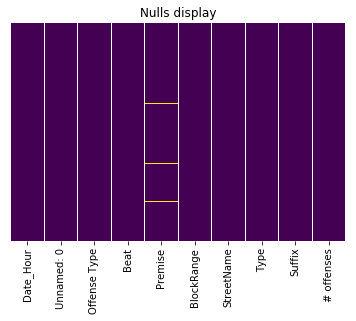

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## col cleaning

- joining similar columns
- renaming

In [15]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2015-02-26 12:00:00,0,Theft,10H10,"Road, Street, or Sidewalk",4900-4999,CANAL,ST,-,1
1,2015-04-05 16:00:00,1,Burglary,10H10,Residence or House,100-199,YORK,-,-,1
2,2015-04-06 20:00:00,2,Rape,10H10,Residence or House,UNK,CANAL,CT,-,1
3,2015-04-16 08:00:00,3,Theft,10H10,Construction Site,400-499,ENNIS,ST,-,1
4,2015-04-01 19:00:00,4,Theft,10H10,NaN,UNK,SIDNEY,-,-,1


In [16]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 10 columns):
Date_Hour      120009 non-null datetime64[ns]
Unnamed: 0     120009 non-null int64
OffenseType    120009 non-null object
Beat           120009 non-null object
Premise        117881 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
Type           120009 non-null object
Suffix         120009 non-null object
NumOffenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.2+ MB


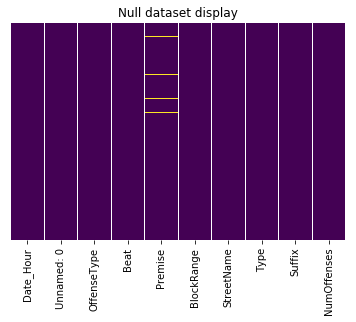

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Subset dataframe to work on 

In [18]:
crimes = df[['Date_Hour','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 7 columns):
Date_Hour      120009 non-null datetime64[ns]
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        117881 non-null object
NumOffenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.4+ MB


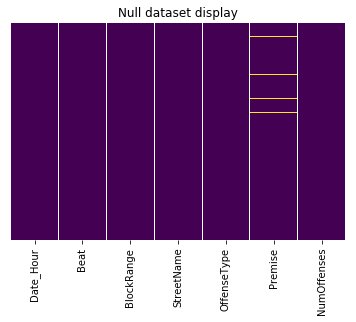

In [19]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

# FIND NAN onevery col

In [20]:
len(crimes[crimes.isnull().any(axis=1)])

2128

In [21]:
crimes[crimes.isnull().any(axis=1)].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
4,2015-04-01 19:00:00,10H10,UNK,SIDNEY,Theft,NaN,1
14,2009-05-18 11:00:00,10H10,4500-4599,CANAL,Theft,NaN,1
27,2015-04-21 13:00:00,10H10,3300-3399,NAVIGATION,Theft,NaN,1
39,2015-04-02 00:00:00,10H20,3800-3899,LAMAR,Burglary,NaN,1
56,2015-04-07 14:00:00,10H20,4300-4399,COYLE,Theft,NaN,1


## Find NaN
- drop if > 2 nan

In [22]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 7 columns):
Date_Hour      120009 non-null datetime64[ns]
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        117881 non-null object
NumOffenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.4+ MB


In [23]:
len(crimes[crimes.isnull().any(axis=1)])

2128

In [24]:
crimes[crimes.isnull().any(axis=1)].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
4,2015-04-01 19:00:00,10H10,UNK,SIDNEY,Theft,NaN,1
14,2009-05-18 11:00:00,10H10,4500-4599,CANAL,Theft,NaN,1
27,2015-04-21 13:00:00,10H10,3300-3399,NAVIGATION,Theft,NaN,1
39,2015-04-02 00:00:00,10H20,3800-3899,LAMAR,Burglary,NaN,1
56,2015-04-07 14:00:00,10H20,4300-4399,COYLE,Theft,NaN,1


## Inspect each column

In [25]:
crimes.dtypes

Date_Hour      datetime64[ns]
Beat                   object
BlockRange             object
StreetName             object
OffenseType            object
Premise                object
NumOffenses             int64
dtype: object

## Beat
- 120 beats

In [26]:
len(crimes.Beat.value_counts())

119

In [27]:
len(crimes.Beat.value_counts(dropna=False))

119

In [28]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I50', '23J50', '24C10', '24C20',
       '24C30', '24C40', '24C50', '24C60', '2A10', '2A20', '2A30', '2A40',
       '2A50', '2A60', '3B10', '3B30', '3B40', '3B50', '4F10', '4F20',
       '4F30', '5F10', '5F20', '5F30', '5F40', '6B10', '6B20', '6B30',
       '6B40', '6B50', '6B60', '7C10', '7C20', '7C30', '7C40', '7C50',
       '

In [29]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
len(crimes.Beat.value_counts(dropna=False))

119

In [31]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

119

In [33]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I50', '23J50', '24C10', '24C20',
       '24C30', '24C40', '24C50', '24C60', '2A10', '2A20', '2A30', '2A40',
       '2A50', '2A60', '3B10', '3B30', '3B40', '3B50', '4F10', '4F20',
       '4F30', '5F10', '5F20', '5F30', '5F40', '6B10', '6B20', '6B30',
       '6B40', '6B50', '6B60', '7C10', '7C20', '7C30', '7C40', '7C50',
       '

In [34]:
crimes.Beat.value_counts(dropna=False).head()

1A20     2716
13D20    2667
19G10    2548
6B60     2493
12D10    2466
Name: Beat, dtype: int64

## BlockRange

In [35]:
len(crimes.BlockRange.value_counts(dropna=False))

245

In [36]:
crimes.BlockRange.value_counts(dropna=False).head()

2300-2399    1678
100-199      1663
900-999      1577
UNK          1560
800-899      1496
Name: BlockRange, dtype: int64

In [37]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
len(crimes.BlockRange.value_counts(dropna=False))

245

## StreetName

In [39]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7918


In [40]:
crimes.StreetName = crimes.StreetName.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7918


In [42]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER     3623
GULF           2138
SAM HOUSTON    1718
NORTH          1701
LOOP           1573
Name: StreetName, dtype: int64


## OffenseType

In [43]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:8


In [44]:
crimes.OffenseType = crimes.OffenseType.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [45]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:8


In [46]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66309
Burglary              19824
Auto Theft            13113
Robbery               10274
Aggravated Assault     9209
Rape                    985
Murder                  287
1                         8
Name: OffenseType, dtype: int64


In [47]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [48]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 66309
Burglary              19824
Auto Theft            13113
Robbery               10274
Aggravated Assault     9209
Rape                    985
Murder                  287
1                         8
Name: OffenseType, dtype: int64


## Premise

In [49]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:125


In [50]:
crimes.Premise = crimes.Premise.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [51]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:125


In [52]:
crimes.Premise.value_counts(dropna=False).head()

Residence or House                     16814
Apartment Parking Lot                  13220
Apartment                              11815
Road, Street, or Sidewalk              11390
Restaurant or Cafeteria Parking Lot     4897
Name: Premise, dtype: int64

# Date as index

In [53]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120009 entries, 0 to 120008
Data columns (total 7 columns):
Date_Hour      120009 non-null datetime64[ns]
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        117881 non-null object
NumOffenses    120009 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.4+ MB


In [54]:
# date
crimes.Date_Hour = pd.to_datetime(crimes.Date_Hour)
crimes = crimes.set_index('Date_Hour').sort_index(ascending=True)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [55]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
Date_Hour,,,,,,
1915-01-05 22:00:00,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1
1915-01-14 23:00:00,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1
1915-04-24 07:00:00,1A20,3100-3199,SMITH,Burglary,Office Building,1
1915-07-30 10:00:00,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1
1915-09-03 13:00:00,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1


## Create Columns with day,weekday,month,year from date index

In [56]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')
crimes['Hour'] = crimes.index.strftime('%H')

In [57]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,day,weekday,month,year,Hour
Date_Hour,,,,,,,,,,,
1915-01-05 22:00:00,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1,05,Tuesday,Jan,1915,22
1915-01-14 23:00:00,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1,14,Thursday,Jan,1915,23
1915-04-24 07:00:00,1A20,3100-3199,SMITH,Burglary,Office Building,1,24,Saturday,Apr,1915,07
1915-07-30 10:00:00,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1,30,Friday,Jul,1915,10
1915-09-03 13:00:00,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1,03,Friday,Sep,1915,13


In [58]:
crimes.day.unique()

array(['05', '14', '24', '30', '03', '29', '15', '25', '23', '28', '08',
       '17', '26', '01', '20', '21', '16', '09', '19', '22', '07', '18',
       '12', '11', '04', '02', '06', '27', '31', '13', '10'], dtype=object)

In [59]:
len(crimes.day.unique())

31

In [60]:
crimes.day.value_counts(dropna=False)

01    4220
02    4154
20    4015
14    4003
10    3994
07    3993
18    3990
12    3986
04    3978
21    3970
19    3963
22    3958
03    3956
23    3955
16    3950
13    3940
09    3931
28    3927
11    3912
15    3898
27    3890
24    3884
17    3884
06    3882
08    3862
05    3834
26    3816
29    3764
25    3637
30    3636
31    2227
Name: day, dtype: int64

In [61]:
crimes.weekday.unique()

array(['Tuesday', 'Thursday', 'Saturday', 'Friday', 'Wednesday', 'Monday',
       'Sunday'], dtype=object)

In [62]:
crimes.weekday.value_counts(dropna=False)

Monday       17968
Friday       17954
Thursday     17419
Wednesday    17174
Saturday     16980
Tuesday      16873
Sunday       15641
Name: weekday, dtype: int64

In [63]:
crimes.month.value_counts(dropna=False)

Jul    10837
Aug    10647
May    10550
Jan    10427
Dec    10322
Jun    10255
Apr    10100
Oct    10091
Sep     9710
Nov     9597
Mar     9419
Feb     8054
Name: month, dtype: int64

In [64]:
crimes.year.value_counts(dropna=False)

2015    119036
2014       782
2013        73
2012        30
2010         9
2005         9
2009         8
1915         8
2011         8
2007         6
2008         5
2000         4
1980         4
2006         4
2003         3
2004         2
1999         2
2001         2
1995         2
1996         2
1998         2
1916         1
1972         1
1989         1
1991         1
1979         1
1993         1
1964         1
2002         1
Name: year, dtype: int64

## null values

- check
- count
- display

In [65]:
crimes.isnull().values.any().any()

True

In [66]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

2128

In [67]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,day,weekday,month,year,Hour
Date_Hour,,,,,,,,,,,
1991-05-23 21:00:00,17E10,6700-6799,HORNWOOD,Rape,NaN,1,23,Thursday,May,1991,21
1993-04-01 13:00:00,5F20,3900-3999,HOLLISTER,Rape,NaN,1,01,Thursday,Apr,1993,13
1998-01-01 23:00:00,17E10,6100-6199,GLENMONT,Rape,NaN,1,01,Thursday,Jan,1998,23
1999-01-01 14:00:00,UNK,8400-8499,STONE,Rape,NaN,1,01,Friday,Jan,1999,14
2000-05-01 11:00:00,18F20,5000-5099,WESTHEIMER,Theft,NaN,1,01,Monday,May,2000,11


In [68]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120009 entries, 1915-01-05 22:00:00 to 2015-12-31 23:00:00
Data columns (total 11 columns):
Beat           120009 non-null object
BlockRange     120009 non-null object
StreetName     120009 non-null object
OffenseType    120009 non-null object
Premise        117881 non-null object
NumOffenses    120009 non-null int64
day            120009 non-null object
weekday        120009 non-null object
month          120009 non-null object
year           120009 non-null object
Hour           120009 non-null object
dtypes: int64(1), object(10)
memory usage: 13.5+ MB


## New Dataframe
- remove premise col
- keep premise description

In [69]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1915-01-05 22:00:00,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1,22,05,Tuesday,Jan,1915
1915-01-14 23:00:00,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1,23,14,Thursday,Jan,1915
1915-04-24 07:00:00,1A20,3100-3199,SMITH,Burglary,Office Building,1,07,24,Saturday,Apr,1915
1915-07-30 10:00:00,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1,10,30,Friday,Jul,1915
1915-09-03 13:00:00,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1,13,03,Friday,Sep,1915


In [70]:
crime_yr.isnull().values.any().any()

True

In [71]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

2128

In [72]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2015-12-30 21:00:00,19G50,9600-9699,BISSONNET,Theft,NaN,1,21,30,Wednesday,Dec,2015
2015-12-30 21:00:00,2A30,1000-1099,STUDE,Theft,NaN,1,21,30,Wednesday,Dec,2015
2015-12-30 23:00:00,1A30,3600-3699,SHEPHERD,Theft,NaN,1,23,30,Wednesday,Dec,2015
2015-12-30 23:00:00,6B50,11400-11499,NORTH,Theft,NaN,1,23,30,Wednesday,Dec,2015
2015-12-31 08:00:00,20G50,700-799,SAM HOUSTON,Theft,NaN,1,08,31,Thursday,Dec,2015


# FIND NANS

## INDEX

In [73]:
len(crime_yr[crime_yr.index.isnull()])

0

In [74]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [75]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1915-01-05 22:00:00', '1915-01-14 23:00:00',
               '1915-04-24 07:00:00', '1915-07-30 10:00:00',
               '1915-09-03 13:00:00', '1915-09-29 16:00:00',
               '1915-12-15 15:00:00', '1915-12-25 17:00:00',
               '1916-06-24 12:00:00', '1964-03-23 19:00:00',
               ...
               '2015-12-31 22:00:00', '2015-12-31 22:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00',
               '2015-12-31 23:00:00', '2015-12-31 23:00:00',
               '2015-12-31 23:00:00', '2015-12-31 23:00:00',
               '2015-12-31 23:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', length=120009, freq=None)

In [76]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [77]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [78]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [79]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

In [80]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [81]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## BlockRAnge

In [82]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [83]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## StreetName

In [84]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [85]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [86]:
crime_yr.StreetName = crime_yr.StreetName.replace(np.nan, 'UNK')

In [87]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

## OffenseType

In [88]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [89]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [90]:
crime_yr.OffenseType = crime_yr.OffenseType.replace(np.nan, 'UNK')

In [91]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

## Hour

In [92]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [93]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Premsie 

In [94]:
len(crime_yr[crime_yr['Premise'].isnull()])

2128

In [95]:
crime_yr[crime_yr['Premise'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1991-05-23 21:00:00,17E10,6700-6799,HORNWOOD,Rape,NaN,1,21,23,Thursday,May,1991
1993-04-01 13:00:00,5F20,3900-3999,HOLLISTER,Rape,NaN,1,13,01,Thursday,Apr,1993
1998-01-01 23:00:00,17E10,6100-6199,GLENMONT,Rape,NaN,1,23,01,Thursday,Jan,1998
1999-01-01 14:00:00,UNK,8400-8499,STONE,Rape,NaN,1,14,01,Friday,Jan,1999
2000-05-01 11:00:00,18F20,5000-5099,WESTHEIMER,Theft,NaN,1,11,01,Monday,May,2000


In [96]:
crime_yr['Premise'] = crime_yr['Premise'].replace(np.nan, 'No label')

In [97]:
len(crime_yr[crime_yr['Premise'].isnull()])

0

In [98]:
crime_yr[crime_yr['Premise'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [99]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [100]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Save

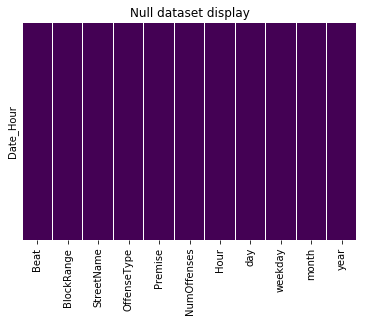

In [101]:
sns.heatmap(crime_yr.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [102]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1915-01-05 22:00:00,3B10,3200-3299,MANGUM RD 180,Theft,Other Parking Lot,1,22,05,Tuesday,Jan,1915
1915-01-14 23:00:00,5F10,7000-7099,WESTVIEW,Auto Theft,Apartment Parking Lot,1,23,14,Thursday,Jan,1915
1915-04-24 07:00:00,1A20,3100-3199,SMITH,Burglary,Office Building,1,07,24,Saturday,Apr,1915
1915-07-30 10:00:00,11H10,5600-5699,TRUETT,Rape,"Other, Unknown, or Not Listed",1,10,30,Friday,Jul,1915
1915-09-03 13:00:00,19G20,11700-11799,BEECHNUT,Burglary,Rental Storage Facility,1,13,03,Friday,Sep,1915


In [103]:
crime_yr.to_csv('crime_data_clean/years/Final_crime15_clean.csv')

In [104]:
ls crime_data_clean/years

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*
